# Covid 19 Data Analysis
## By Blessing Ihedioha
### Learning Objective
* Answer the question: Is there a correlation between the spread of corona in the countries and the level of how happy the people living in that country are.
* Importing COVID19 dataset and preparing it for the analysis by dropping columns and aggregating rows.
* Finding and calculating a good measure for the analysis.
* Merging two datasets and finding correlations among the datasets.
* Visualizing analysis results using Seaborn.

In [ ]:
#Import pandas, numpy, seaborn, and matplotlib module
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
#Import the covid 19 Dataset by John Hopkin University  using .read_csv
covid19_csv_Data = pd.read_csv("Downloads\covid19_Confirmed_dataset.csv")

In [ ]:
#Check the shape of the dataframe
covid19_csv_Data.shape #Dataset has 266 by 104 cells. 

In [ ]:
#Clean out some unwanted columns 
covid19_csv_Data.drop(["Lat", "Long"], axis =1, inplace = True)

In [67]:
#Aggregating the rows by the country
Covid19_data_aggregated = covid19_csv_Data.groupby("Country/Region").sum()

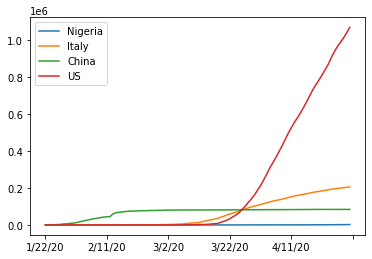

In [68]:
#Visualizing data related to a country, for instance Nigeria
Covid19_data_aggregated.loc["Nigeria"].plot()
Covid19_data_aggregated.loc["Italy"].plot()
Covid19_data_aggregated.loc["China"].plot()
Covid19_data_aggregated.loc["US"].plot()
plt.legend()

In [ ]:
#caculating the first derivative of the curve Nigeria
Covid19_data_aggregated.loc["Nigeria"].diff().plot()
plt.legend()

In [ ]:
#caculating the first derivative of the curve US
Covid19_data_aggregated.loc["US"].diff().plot()
plt.legend()

In [ ]:
#caculating the first derivative of the curve China
Covid19_data_aggregated.loc["China"].diff().plot()
plt.legend()

In [ ]:
#caculating the first derivative of the curve Italy
Covid19_data_aggregated.loc["Italy"].diff().plot()
plt.legend()

In [ ]:
# find maxmimum infection rate for the countries
Covid19_data_aggregated.loc["Nigeria"].diff().max() # the maximum infection rate for China 

#Use the For loop to calculate the maximum infaction rate for all the countries
Countries = list(Covid19_data_aggregated.index)
max_Infection_Rate = []
for c in Countries:
   max_Infection_Rate.append(Covid19_data_aggregated.loc[c].diff().max())
Covid19_data_aggregated["max_Infection_Rate"]= max_Infection_Rate


In [ ]:
#create a new dataframe with only needed column
Corona_data = pd.DataFrame(Covid19_data_aggregated["max_Infection_Rate"])

### Import happiness_report_csv  data set

In [ ]:
happiness_report_csv = pd.read_csv("Downloads\worldwide_happiness_report.csv") 

In [ ]:
#Clean out some unwanted columns
Useless_Cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(Useless_Cols, axis = 1, inplace = True)

In [ ]:
# changing the indices of the dataframe
happiness_report_csv.set_index("Country or region",inplace = True)

In [63]:
#now let's join two dataset we have prepared
data = Corona_data.join(happiness_report_csv, how = "inner")

In [64]:
data.corr()

,max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_Infection_Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


C:\Users\ihedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_Infection_Rate'>

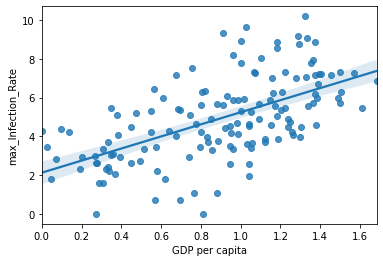

In [69]:
#Plotting GDP vs maximum Infection rate
x = data["GDP per capita"]
y = data["max_Infection_Rate"]
sns.regplot(x,np.log(y))

In [ ]:
#Plotting Healthy life expectancy vs maximum Infection rate
x = data["Healthy life expectancy"]
y = data["max_Infection_Rate"]
sns.regplot(x,np.log(y))

In [ ]:
#Plotting Freedom to make life choices vs maximum Infection rate
x = data["Freedom to make life choices"]
y = data["max_Infection_Rate"]
sns.regplot(x,np.log(y))